## Plotters for the AUTOASSESS

## Plotter methods

In [21]:
import bagpy
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as Rot
from bagpy import bagreader
import numpy as np

def plot_position(bag_path, plot_name=None): 
    
    # Load the bag file
    bag = bagreader(bag_path)

    # Read the specific topic, replace '/poseStamped_topic' with your topic name
    pose_data = bag.message_by_topic('/pose_in')
    odom_data = bag.message_by_topic('/flynav/vio_odom')

    # Load the data into a pandas dataframe
    df = pd.read_csv(pose_data)
    df_ = pd.read_csv(odom_data)

    # Plot the data (for example, plotting position x and y over time)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6,6), sharex=True)
    
    # TODO: Add plot title
    ax1.plot(df['Time'], df['pose.position.x'], label='x_r', color='r')
    ax1.plot(df_['Time'], df_['pose.pose.position.x'], label='x_m', linestyle='--', color='r')
    ax1.legend()
    ax1.grid()

    ax2.plot(df['Time'], df['pose.position.y'], label='y_r', color='g')
    ax2.plot(df_['Time'], df_['pose.pose.position.y'], label='y_m', linestyle='--', color='g')
    ax2.legend()
    ax2.grid()

    ax3.plot(df['Time'], df['pose.position.z'], label='y_r', color='b')
    ax3.plot(df_['Time'], df_['pose.pose.position.z'], label='y_m', linestyle='--', color='b')
    ax3.legend()
    ax3.grid()  
    if plot_name:
        fig.savefig(f'{plot_name}.png')
    
def plot_odometries(bag_path, plot_name=None): 
    
    bag = bagreader(bag_path)
    
    odom1_data = bag.message_by_topic('/flynav/vio_odom')
    odom2_data = bag.message_by_topic('/kalman_scan2map_node/odometry_ros')
    
    df1 = pd.read_csv(odom1_data)
    df2 = pd.read_csv(odom2_data)
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    
    ax1.plot(df1['Time'], df1['pose.pose.position.x'], label='xv', color='r')
    ax1.plot(df2['Time'], df2['pose.pose.position.x'], label='xf', linestyle='--', color='r')
    ax1.legend()
    ax1.grid()
    
    ax2.plot(df1['Time'], df1['pose.pose.position.y'], label='yv', color='g')
    ax2.plot(df2['Time'], df2['pose.pose.position.y'], label='yf', linestyle='--',color='g')
    ax2.legend()
    ax2.grid()
    
    ax3.plot(df1['Time'], df1['pose.pose.position.z'], label='zv', color='b')
    ax3.plot(df2['Time'], df2['pose.pose.position.z'], label='zf', linestyle='--',color='b')
    ax3.legend()
    ax3.grid()
    if plot_name:
        fig.savefig(f'./figures/{plot_name}.png')
    
def plot_opti_position(bag_path, plot_name=None): 
    # Load the bag file
    bag = bagreader(bag_path)

    # Read the specific topics
    pose_ee = bag.message_by_topic('/mocap_helper/opt_elios_pose')
    pose_uav = bag.message_by_topic('/mocap_helper/opt_ee_pose')

    # Load the data into pandas dataframes
    df_ee = pd.read_csv(pose_ee)
    df_uav = pd.read_csv(pose_uav)

    # Plot the data (for example, plotting position x, y, and z over time)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    
    ax1.plot(df_uav['Time'], df_uav['pose.position.x'], label='x_uav', color='r')
    ax1.plot(df_ee['Time'], df_ee['pose.position.x'], label='x_ee', linestyle='--', color='r')
    ax1.legend()
    ax1.grid()

    ax2.plot(df_uav['Time'], df_uav['pose.position.y'], label='y_uav', color='g')
    ax2.plot(df_ee['Time'], df_ee['pose.position.y'], label='y_ee', linestyle='--', color='g')
    ax2.legend()
    ax2.grid()

    ax3.plot(df_uav['Time'], df_uav['pose.position.z'], label='z_uav', color='b')
    ax3.plot(df_ee['Time'], df_ee['pose.position.z'], label='z_ee', linestyle='--', color='b')
    ax3.legend()
    ax3.grid()

    plt.show()
    if plot_name: 
        fig.savefig(f'./figures/{plot_name}.png')
    
def plot_opti_position_and_estimate(bag_path, Tcalib, plot_name=None): 
    # Load the bag file
    bag = bagreader(bag_path)

    # Read the specific topics
    pose_ee = bag.message_by_topic('/mocap_helper/opt_elios_pose')
    pose_uav = bag.message_by_topic('/mocap_helper/opt_ee_pose')

    # Load the data into pandas dataframes
    df_ee = pd.read_csv(pose_ee)
    df_uav = pd.read_csv(pose_uav)
    
    x,y,z,qx,qy,qz,qw = extract_odom(df_uav)
    T_uav = create_T_list(x, y, z, qx, qy, qz, qw)
    x_ee, y_ee, z_ee, qx_ee, qy_ee, qz_ee, qw_ee = extract_odom(df_ee)
    newT_ = get_ee_est(Tcalib, T_uav)
        
    x_ = [T_[0, 3] for T_ in newT_]
    y_ = [T_[1, 3] for T_ in newT_]
    z_ = [T_[2, 3] for T_ in newT_] 

    # Plot the data (for example, plotting position x, y, and z over time)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    
    ax1.plot(df_uav['Time'], df_uav['pose.position.x'], label='x_uav', color='r')
    ax1.plot(df_ee['Time'], df_ee['pose.position.x'], label='x_ee', linestyle='--', color='r')
    ax1.plot(df_uav['Time'], x_, label='x_est')
    ax1.legend()
    ax1.grid()

    ax2.plot(df_uav['Time'], df_uav['pose.position.y'], label='y_uav', color='g')
    ax2.plot(df_ee['Time'], df_ee['pose.position.y'], label='y_ee', linestyle='--', color='g')
    ax2.plot(df_uav['Time'], y_, label='y_est')
    ax2.legend()
    ax2.grid()

    ax3.plot(df_uav['Time'], df_uav['pose.position.z'], label='z_uav', color='b')
    ax3.plot(df_ee['Time'], df_ee['pose.position.z'], label='z_ee', linestyle='--', color='b')
    ax3.plot(df_uav['Time'], z_, label='z_est')
    ax3.legend()
    ax3.grid()

    if plot_name: 
        plt.savefig(f'./figures/{plot_name}.png')
    plt.show()
    
def plot_opti_3d():  

    # Create a 3D scatter plot
    fig_3d = plt.figure(figsize=(10, 10))
    ax_3d = fig_3d.add_subplot(111, projection='3d')

    ax_3d.scatter(df_uav['pose.position.x'], df_uav['pose.position.y'], df_uav['pose.position.z'], c='r', label='uav')
    ax_3d.scatter(df_ee['pose.position.x'], df_ee['pose.position.y'], df_ee['pose.position.z'], c='b', label='ee')

    ax_3d.set_xlabel('X Position')
    ax_3d.set_ylabel('Y Position')
    ax_3d.set_zlabel('Z Position')
    ax_3d.legend()
    ax_3d.grid()
    
def plot_p(x, y, z):
    plt.figure(figsize=(10, 4))
    
    # Plot x, y, z
    plt.plot(x, color='red', label='x position')
    plt.plot(y, color='green', label='y position')
    plt.plot(z, color='blue', label='z position')
    
    # Add grid
    plt.grid(True)
    
    # Add labels and title
    plt.xlabel('Time (or Index)')
    plt.ylabel('Position')
    plt.title('Position vs. Time/Index')
    
    # Add legend
    plt.legend()
    
    # Show plot
    plt.show()
    
def plot_rot(T):
    roll_, pitch_, yaw_ = [], [], []
    for T_ in T: 
        R = T_[:3, :3]
        r =  Rot.from_matrix(R)
        angles = r.as_euler("zyx", degrees=False)
        roll_.append(angles[2])
        pitch_.append(angles[1])
        yaw_.append(angles[0])
    plt.figure(figsize=(10, 4))
    plt.plot(roll_, label='roll', color='r')
    plt.plot(pitch_, label='pitch', color='g')
    plt.plot(yaw_, label='yaw', color='b')
    # Add labels and title
    plt.xlabel('Sample')
    plt.ylabel('Angle')
    plt.title('Roll, pitch, and yaw vs time')
    plt.legend()
    plt.grid()
    
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

def plot_rmse_and_stats(df_ee, x_rmse, y_rmse, z_rmse, n=0):
    """
    Plots RMSE over time in a 3x2 grid. The first column contains line plots of 
    RMSE values, and the second column contains bar charts displaying the mean 
    and standard deviation of these RMSE values.

    The second column is narrower, with a 3:1 width ratio compared to the first column.
    
    Parameters:
    - df_ee: DataFrame containing the 'Time' column.
    - x_rmse, y_rmse, z_rmse: Arrays or lists containing RMSE values for x, y, and z axes.
    - n: Starting index for plotting (default is 0).
    """
    # Create a figure with custom GridSpec to control column widths
    fig = plt.figure(figsize=(14, 12))
    gs = GridSpec(3, 2, width_ratios=[3, 1], figure=fig)

    # First row: x_rmse line plot
    x_max = np.max(x_rmse)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(df_ee['Time'][n:], x_rmse, label='x_rmse', color='red')
    ax1.set_title(f'x_rmse vs Time (Max: {x_max:.2f})')
    ax1.grid(True)
    ax1.legend()

    # First row: x_rmse bar chart with mean and std deviation
    x_mean = np.mean(x_rmse)
    x_std = np.std(x_rmse)
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.bar(['Mean'], [x_mean], yerr=[x_std], color='red', capsize=5)
    ax2.set_title(f'x_rmse mean/dev')
    ax2.set_ylim([0, x_max * 1.1])

    # Second row: y_rmse line plot
    y_max = np.max(y_rmse)
    ax3 = fig.add_subplot(gs[1, 0])
    ax3.plot(df_ee['Time'][n:], y_rmse, label='y_rmse', color='green')
    ax3.set_title(f'y_rmse vs Time (Max: {y_max:.2f})')
    ax3.grid(True)
    ax3.legend()

    # Second row: y_rmse bar chart with mean and std deviation
    y_mean = np.mean(y_rmse)
    y_std = np.std(y_rmse)
    ax4 = fig.add_subplot(gs[1, 1])
    ax4.bar(['Mean'], [y_mean], yerr=[y_std], color='green', capsize=5)
    ax4.set_title(f'y_rmse mean/dev')
    ax4.set_ylim([0, y_max * 1.1])

    # Third row: z_rmse line plot
    z_max = np.max(z_rmse)
    ax5 = fig.add_subplot(gs[2, 0])
    ax5.plot(df_ee['Time'][n:], z_rmse, label='z_rmse', color='blue')
    ax5.set_title(f'z_rmse vs Time (Max: {z_max:.2f})')
    ax5.grid(True)
    ax5.legend()

    # Third row: z_rmse bar chart with mean and std deviation
    z_mean = np.mean(z_rmse)
    z_std = np.std(z_rmse)
    ax6 = fig.add_subplot(gs[2, 1])
    ax6.bar(['Mean'], [z_mean], yerr=[z_std], color='blue', capsize=5)
    ax6.set_title(f'z_rmse mean/dev')
    ax6.set_ylim([0, z_max * 1.1])

    # Overall title for the entire figure
    fig.suptitle('RMSE p_ee vs p_est and Statistical Summary', fontsize=16)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Show the plot
    plt.savefig('./figures/estimate_rms_ee.png')
    plt.show()
    
def plot_pos_acc(df_pos_uav, df_acc_uav, t_end=None): 
    
    t = df_acc_uav['Time']
    t = scale_time(t)
    ax = df_acc_uav['acceleration_semibody.x']
    ay = df_acc_uav['acceleration_semibody.y']
    az = df_acc_uav['acceleration_semibody.z']
    yawrate = df_acc_uav['yaw_rate_body']
    t_, x, y, z, qx, qy, qz, qw = extract_nav_odom(df_pos_uav)
    t_ = scale_time(t_)

    if t_end:
        it_ = find_closest_index(t, t_end); t_ = t_[:it_]; x=x[:it_]; y=y[:it_]; z=z[:it_]
        it = find_closest_index(t, t_end); t = t[:it]; ax = ax[:it]; ay = ay[:it]; az = az[:it]

    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(8, 8), sharex=True)
    ax1.plot(t_, x, color='red')
    ax1.grid()
    ax1.set_xlim(0, max(t_))
    ax2.plot(t, ax, color='red')
    ax2.grid()
    ax2.set_xlim(0, max(t_))
    ax3.plot(t_, y, color='green')
    ax3.grid()
    ax3.set_xlim(0, max(t_))
    ax4.plot(t, ay, color='green')
    ax4.grid()
    ax4.set_xlim(0, max(t_))
    ax5.plot(t_, z, color='blue')
    ax5.grid()
    ax6.plot(t, az-10.81, color='blue')
    ax6.grid()
    
def plot_pos_acc_imu(df_pos_uav, df_acc_uav, df_imu, t_end=None): 
    
    t = df_acc_uav['Time']
    t = scale_time(t)
    ax = df_acc_uav['acceleration_semibody.x']
    ay = df_acc_uav['acceleration_semibody.y']
    az = df_acc_uav['acceleration_semibody.z']
    tm = df_imu['Time']
    tm = scale_time(tm)
    ax_m = df_imu['linear_acceleration.x']
    ay_m = df_imu['linear_acceleration.y']
    az_m = df_imu['linear_acceleration.z']
    
    yawrate = df_acc_uav['yaw_rate_body']
    t_, x, y, z, qx, qy, qz, qw = extract_nav_odom(df_pos_uav)
    t_ = scale_time(t_)

    if t_end:
        it_ = find_closest_index(t, t_end); t_ = t_[:it_]; x=x[:it_]; y=y[:it_]; z=z[:it_]
        it = find_closest_index(t, t_end); t = t[:it]; ax = ax[:it]; ay = ay[:it]; az = az[:it]

    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(8, 8), sharex=True)
    ax1.plot(t_, x, color='red')
    ax1.grid()
    ax1.set_xlim(0, max(t_))
    ax2.plot(t, ax, color='red')
    ax2.plot(tm, ax_m, color='red', linestyle='--', linewidth=0.2)
    ax2.grid()
    ax2.set_xlim(0, max(t_))
    ax3.plot(t_, y, color='green')
    ax3.grid()
    ax3.set_xlim(0, max(t_))
    ax4.plot(t, ay, color='green')
    ax4.plot(tm, ay_m, color='green', linestyle='--', linewidth=0.2)
    ax4.grid()
    ax4.set_xlim(0, max(t_))
    ax5.plot(t_, z, color='blue')
    ax5.grid()
    ax6.plot(t, az-10.81, color='blue')
    ax6.plot(tm, az_m, color='blue', linestyle='--', linewidth=0.2)
    ax6.grid()
    
def plot_acc(df_acc_uav, df_imu, t_end): 
    t = df_acc_uav['Time']
    t = scale_time(t)
    ax = df_acc_uav['acceleration_semibody.x']
    ay = df_acc_uav['acceleration_semibody.y']
    az = df_acc_uav['acceleration_semibody.z']
    tm = df_imu['Time']
    tm = scale_time(tm)
    ax_m = df_imu['linear_acceleration.x']
    ay_m = df_imu['linear_acceleration.y']
    az_m = df_imu['linear_acceleration.z']
    
    if t_end:
        it = find_closest_index(t, t_end); t = t[:it_]; ax=ax[:it_]; ay=ay[:it_]; az=az[:it_]
        itm = find_closest_index(tm, t_end); tm = tm[:itm]; ax_m = ax_m[:itm]; ay_m = ay_m[:itm]; az_m = az_m[:itm]
        
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8), sharex=True)
    ax1.plot(t, ax, color='red')
    ax1.plot(tm, ax_m, color='red', linestyle='--', linewidth=0.2)
    ax1.grid()
    ax1.set_xlim(0, max(t_))
    ax2.plot(t, ay, color='green')
    ax2.plot(tm, ay_m, color='green', linestyle='--', linewidth=0.2)
    ax2.grid()
    ax2.set_xlim(0, max(t_))
    ax3.plot(t, az-10.81, color='blue')
    ax3.plot(tm, az_m-10.81, color='blue', linestyle='--', linewidth=0.2)
    ax3.grid()
    
def get_ee_est(Tcalib, Tuav):
    Tee_est_full = []
    for Tu in Tuav:
        Tee_est = np.matmul(Tu, np.linalg.inv(Tcalib))
        Tee_est_full.append(Tee_est)
    return Tee_est_full

## Extractors

In [22]:
def extract_odom(odom): 
    x = odom['pose.position.x']
    y = odom['pose.position.y']
    z = odom['pose.position.z']
    qx = odom['pose.orientation.x']
    qy = odom['pose.orientation.y']
    qz = odom['pose.orientation.z']
    qw = odom['pose.orientation.w']
    return x,y,z,qx,qy,qz,qw

def extract_nav_odom(nav_odom): 
    t = nav_odom['Time']
    x = nav_odom['pose.pose.position.x']
    y = nav_odom['pose.pose.position.y']
    z = nav_odom['pose.pose.position.z']
    qx = nav_odom['pose.pose.orientation.x']
    qy = nav_odom['pose.pose.orientation.y']
    qz = nav_odom['pose.pose.orientation.z']
    qw = nav_odom['pose.pose.orientation.w']
    return t, x,y,z,qx,qy,qz,qw

def extract_acc_cmd(df_acc_uav, t_end):
    t = df_acc_uav['Time']
    t = scale_time(t)
    ax = df_acc_uav['acceleration_semibody.x']
    ay = df_acc_uav['acceleration_semibody.y']
    az = df_acc_uav['acceleration_semibody.z']
    
    if t_end:
        it = find_closest_index(t, t_end); t = t[:it]; ax=ax[:it]; ay=ay[:it]; az=az[:it]
    
    return t, ax, ay, az

def extract_acc_meas(df_imu, t_end): 
    
    t = df_imu['Time']
    t = scale_time(t)
    ax = df_imu['linear_acceleration.x']
    ay = df_imu['linear_acceleration.y']
    az = df_imu['linear_acceleration.z']
    
    if t_end:
        it = find_closest_index(t, t_end); t = t[:it]; ax=ax[:it]; ay=ay[:it]; az=az[:it]
    
    return t, ax, ay, az

def get_x_regions(x, y, threshold):
    regions = []
    in_region = False
    start = None
    
    for i in range(len(y)):
        if y[i] > threshold and not in_region:
            # Start of a new region
            start = x[i]
            in_region = True
        elif y[i] <= threshold and in_region:
            # End of the region
            stop = x[i-1]
            regions.append((start, stop))
            in_region = False
    
    # If the last region goes till the end
    if in_region:
        regions.append((start, x[-1]))

    return regions

## Transformation matrices

Pose of the elios in the world (optitrack frame is described as): 
$$T_{W}^{B} $$

Pose of the end effector in the world frame is described as: 
$$T_{W}^{ee}$$

Pose of the end effector in the base frame is described as: 
$$T_{B}^{ee} = T_{B}^{W}T_{W}^{ee} = (T_{W}^{B})^{-1}T_{W}^{ee}$$ 

In [23]:
# Convert quaternion to the rotational matrix
def quat2rot(q):
    
    x, y, z, w = q
    r = Rot.from_quat([x, y, z, w])
    return r.as_matrix()

def get_yaw_from_rotation_matrix(R):
    """
    Extract the yaw angle from a 3x3 rotation matrix.
    
    Parameters:
    R -- A 3x3 numpy array representing the rotation matrix.
    
    Returns:
    Yaw angle in radians.
    """
    # Extract elements from the rotation matrix
    R11 = R[0, 0]
    R21 = R[1, 0]
    
    # Compute the yaw angle
    yaw = np.arctan2(R21, R11)
    
    return yaw

# Convert extracted odometry to the T
def convT(x,y,z,qx,qy,qz,qw): 
    R = quat2rot((qx, qy, qz, qw))
    p = np.array([x, y, z]).reshape(3, 1)
    T = np.hstack((R, p))
    T = np.vstack((T, np.array([0, 0, 0, 1])))
    return T

# Create list from T
def create_T_list(x, y, z, qx, qy, qz, qw):
    T_list = []
    for x_,y_,z_,qx_,qy_,qz_,qw_ in zip(x,y,z,qx,qy,qz,qw): 
        T_ = convT(x_,y_,z_, qx_,qy_,qz_,qw_)
        T_list.append(T_)
    return T_list

# Invert Ts in the list
def inv_T_list(T_list): 
    invT = []
    for T_ in T_list: 
        invT.append(np.linalg.inv(T_))
    return invT

# Calibrate end effector [Check this part]
def calibrate_ee(T_uav, T_ee):
    T_list = []
    for T, T_inv in zip(T_ee, inv_T_list(T_uav)):
        T_mut = np.matmul(T_inv, T)
        T_new = np.round(T_mut, 4)
        T_list.append(T_new)
    return T_list

def calibrate_ee(T_uav, T_ee):
    T_list = []
    for T, T_inv in zip(T_ee, T_uav): 
        T_mut = np.matmul(T_inv, T)
        T_new = np.round(T_mut, 4)
        T_list.append(T_new)
    return T_list

# Load the bag file [Create T_uav, T_ee, and T_calib] lists
def get_Ts(bag_pth): 
    bag = bagreader(bag_pth)

    # Read the specific topic, replace '/poseStamped_topic' with your topic name
    pose_uav = bag.message_by_topic('/mocap_helper/opt_elios_pose')
    pose_ee = bag.message_by_topic('/mocap_helper/opt_ee_pose')
    df_uav = pd.read_csv(pose_uav)
    df_ee = pd.read_csv(pose_ee)

    x,y,z,qx,qy,qz,qw = extract_odom(df_uav)
    x_ee, y_ee, z_ee, qx_ee, qy_ee, qz_ee, qw_ee = extract_odom(df_ee)

    T_uav = create_T_list(x, y, z, qx, qy, qz, qw)
    T_ee = create_T_list(x_ee, y_ee, z_ee, qx_ee, qy_ee, qz_ee, qw_ee)
    T_calib = calibrate_ee(T_uav, T_ee)
    return T_uav, T_ee, T_calib

# Rotation matrices average 
def avg_T(T_calib): 
    x_ = [T_[0, 3] for T_ in T_calib]
    y_ = [T_[1, 3] for T_ in T_calib]
    z_ = [T_[2, 3] for T_ in T_calib]
    plot_p(x_, y_, z_)

    x_mean = np.mean(x_)
    y_mean = np.mean(y_)
    z_mean = np.mean(z_)
    p_mean = np.array([x_mean, y_mean, z_mean]).reshape(3, 1)

    T_calib_ = np.hstack((np.eye(3), p_mean))
    T_calib_ = np.vstack((T_calib_, [0, 0, 0, 1]))
    return T_calib_

def get_est(T_uav, T_): 
    newT_ = []
    for Tu in T_uav:
        newT = np.matmul(Tu, T_)
        newT_.append(newT)
        
    x_ = [T_[0, 3] for T_ in newT_]
    y_ = [T_[1, 3] for T_ in newT_]
    z_ = [T_[2, 3] for T_ in newT_] 
    
    return x_, y_, z_

## UTILS


In [24]:
def rmse(x_ee, x_est): 
    return [np.sqrt((x_ - x_est_)**2) for x_, x_est_ in zip(x_ee.to_list(), x_est)]
    
def er_diff(x_ee, x_est): 
    return [(x_ - x_est_) for x_, x_est_ in zip(x_ee.to_list(), x_est)]

def find_closest_index(lst, target):
    # Calculate the difference between each element and the target
    differences = [abs(x - target) for x in lst]
    # Find the index of the smallest difference
    closest_index = differences.index(min(differences))
    return closest_index

def scale_time(time):
    new_t = time-time[0]
    return new_t

[INFO]  Data folder ./bags/ground_effect already exists. Not creating.


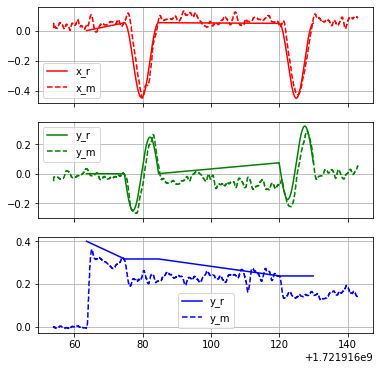

In [25]:
plot_position('./bags/ground_effect.bag', "ground_effect")

## Comments and observations: 

No I term currently. Rope can induce disturbance. Ground effect can induce dusturbance. 


[INFO]  Data folder ./bags/square_circle already exists. Not creating.
[INFO]  Data folder ./bags/square_circle already exists. Not creating.


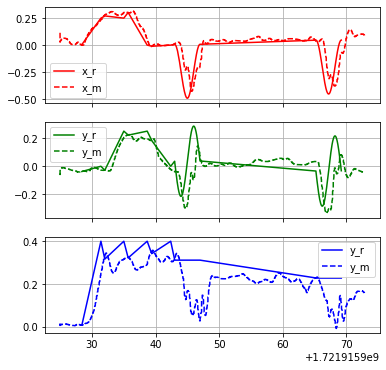

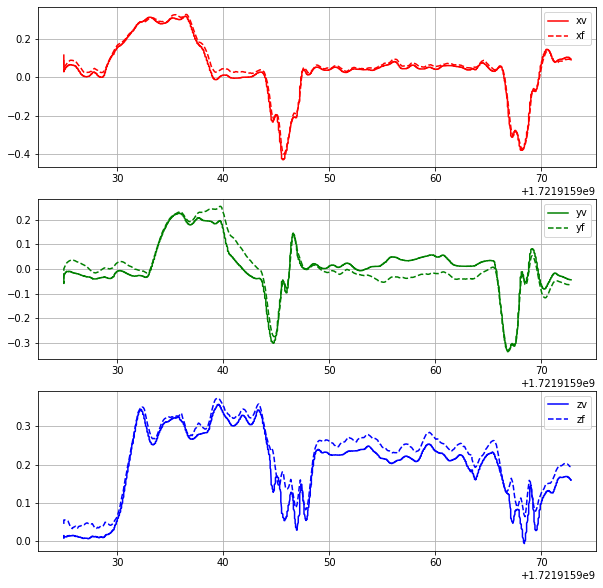

In [26]:
plot_position('./bags/square_circle.bag', 'square_circle')
plot_odometries('./bags/square_circle.bag', 'compare_odometries')

[INFO]  Data folder ./bags/ground_effect already exists. Not creating.
[INFO]  Data folder ./bags/ground_effect already exists. Not creating.


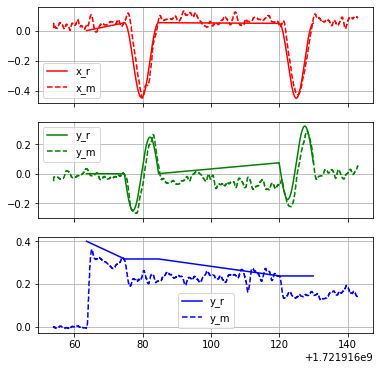

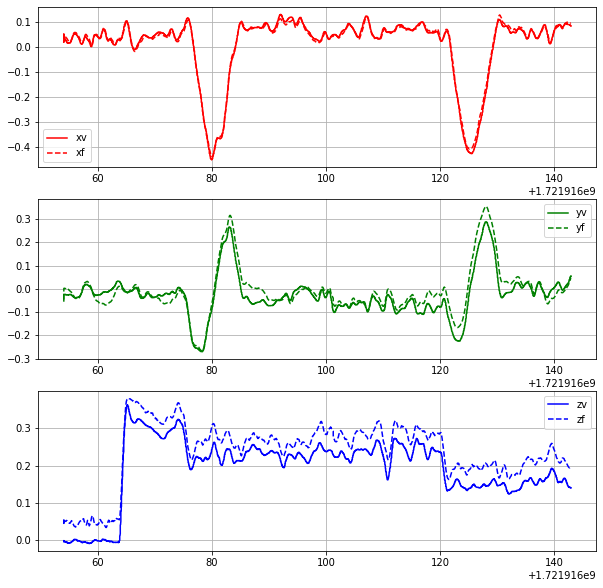

In [27]:
plot_position('./bags/ground_effect.bag')
plot_odometries('./bags/ground_effect.bag')

[INFO]  Data folder ./bags/aerial_manip already exists. Not creating.


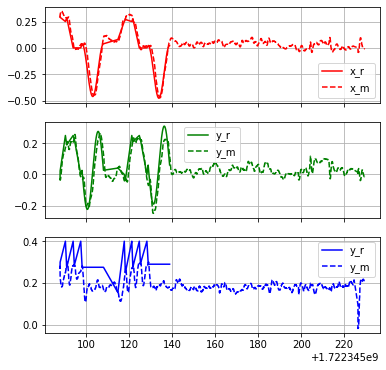

In [28]:
plot_position('./bags/aerial_manip.bag')


[INFO]  Data folder ./bags/mocap1 already exists. Not creating.


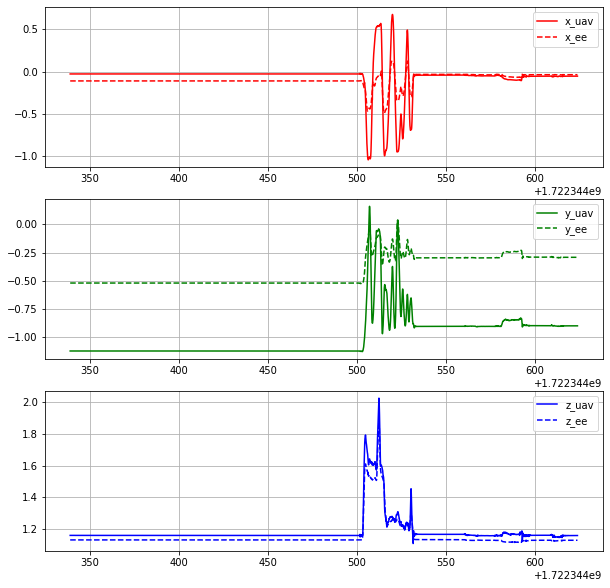

[INFO]  Data folder ./bags/mocap2 already exists. Not creating.


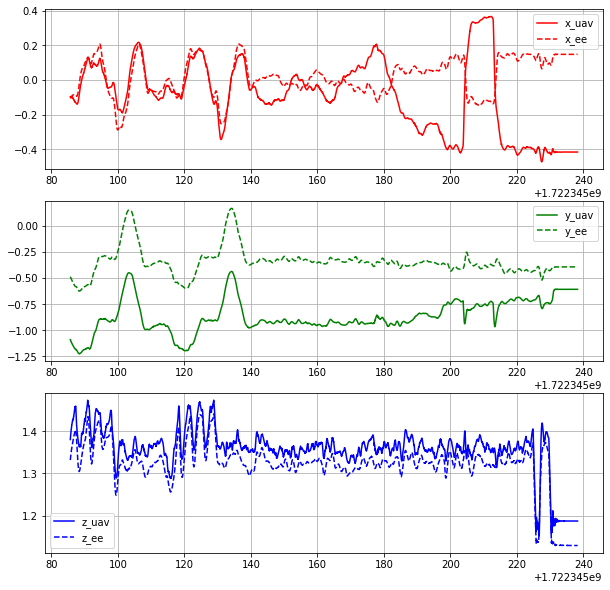

[INFO]  Data folder ./bags/mocap3 already exists. Not creating.


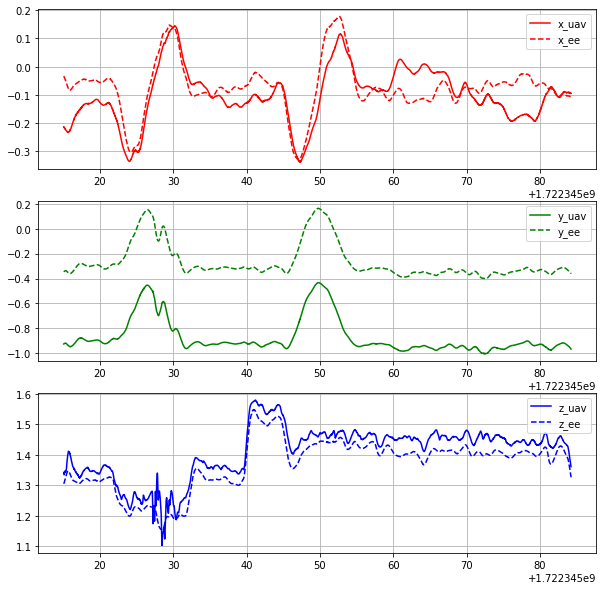

In [29]:
plot_opti_position('./bags/mocap1.bag', 'mocap1')
plot_opti_position('./bags/mocap2.bag', 'mocap2')
plot_opti_position('./bags/mocap3.bag', 'mocap3')

## Few operational problems: 

- Optitrack and Flyability are on the same network, hence it is hard to collect and use data simultaneously
- T_ee_B changes depending on the measurements because of the optitrack collection routine, now it should be fine :)



[INFO]  Data folder ./bags/mocap6_rotation already exists. Not creating.
[INFO]  Data folder ./bags/mocap6_rotation already exists. Not creating.


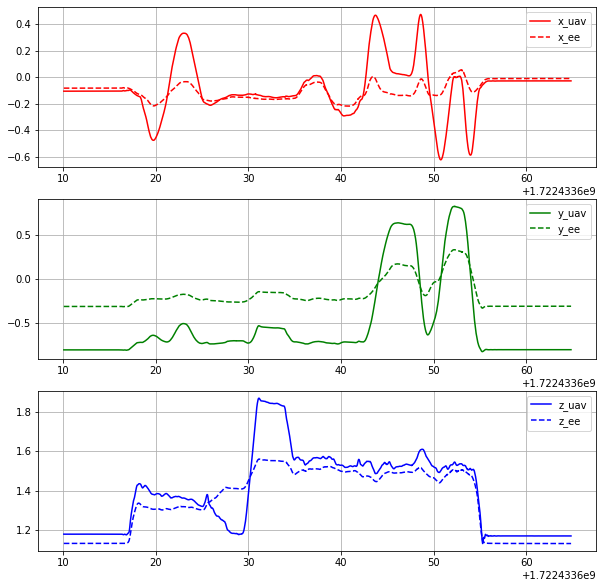

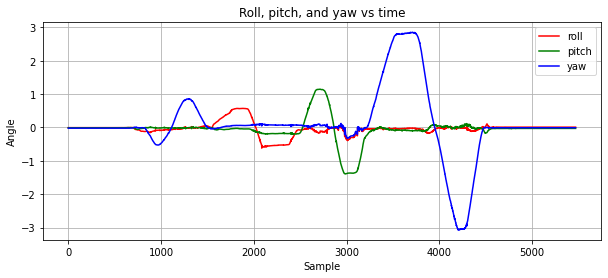

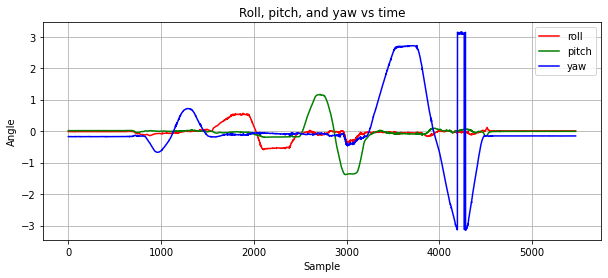

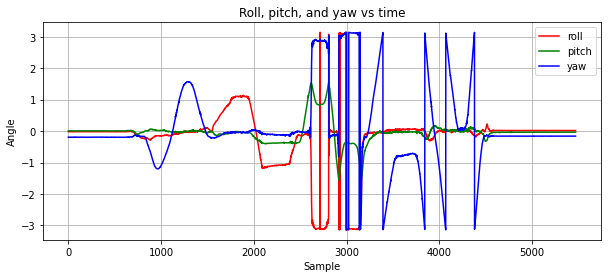

In [30]:
#plot_odometries('./bags/aerial_manip.bag')
T_uav, T_ee, T_calib = get_Ts('./bags/mocap6_rotation.bag')
plot_opti_position('./bags/mocap6_rotation.bag')
plot_rot(T_uav)
plot_rot(T_ee)
plot_rot(T_calib)

#plot_opti_position('./bags/mocap2.bag')
#plot_p(x_, y_, z_)

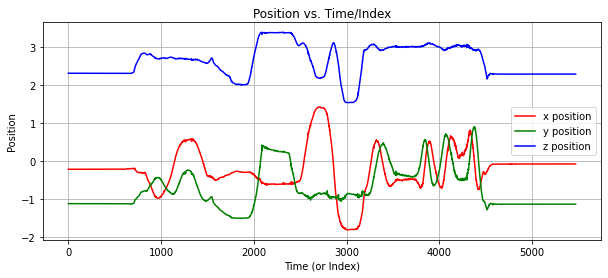

[[ 1.          0.          0.         -0.22422768]
 [ 0.          1.          0.         -0.72146866]
 [ 0.          0.          1.          2.62022019]
 [ 0.          0.          0.          1.        ]]
[INFO]  Data folder ./bags/mocap6_rotation already exists. Not creating.


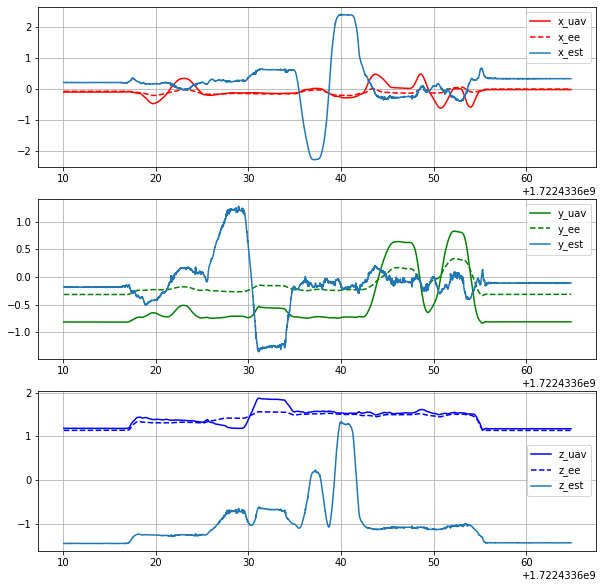

In [31]:
x_ = [T_[0, 3] for T_ in T_calib]
y_ = [T_[1, 3] for T_ in T_calib]
z_ = [T_[2, 3] for T_ in T_calib]
plot_p(x_, y_, z_)

x_mean = np.mean(x_)
y_mean = np.mean(y_)
z_mean = np.mean(z_)
p_mean = np.array([x_mean, y_mean, z_mean]).reshape(3, 1)

T_calib_ = np.hstack((np.eye(3), p_mean))
T_calib_ = np.vstack((T_calib_, [0, 0, 0, 1]))
print(T_calib_)

plot_opti_position_and_estimate('./bags/mocap6_rotation.bag', T_calib_, 'mocap_calib')

## TODO: 
- [x] Compare estimated T with one I have, and make sure it is correct :) it is correct but we need to minimize it :)  
- [ ] Put it in overleaf
- [ ] Clip 
- [ ] Scale time
- [ ] Optimization of the found matrices (across some time horizon) 

## Explore bags

[INFO]  Data folder ./bags/mocap_hend_uav already exists. Not creating.


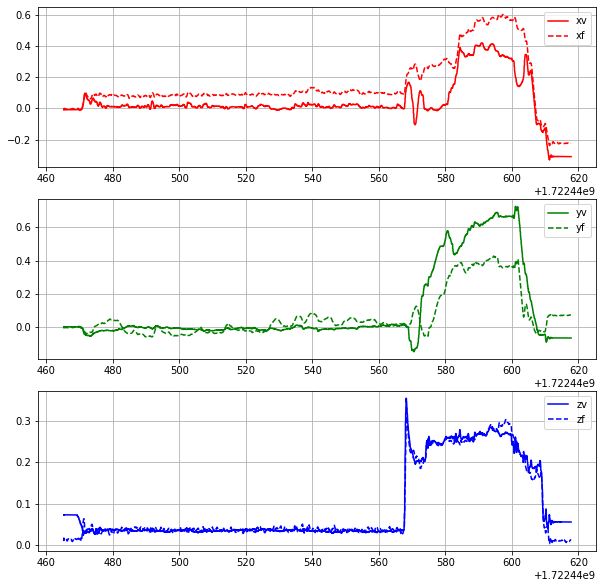

In [32]:
plot_odometries('./bags/mocap_hend_uav.bag')


In [33]:
T_calib = getTcalib('./bags/mocap_hand.bag')

NameError: name 'getTcalib' is not defined

## Averaging rotation matrice: 

- https://www.mathworks.com/matlabcentral/answers/1996053-averaging-rotation-matrices-and-calculating-the-variability
- https://mtaylor.web.unc.edu/wp-content/uploads/sites/16915/2018/04/RAVG.pdf

In [ ]:
plot_opti_position_and_estimate('./bags/mocap_hand.bag', T_calib_)

In [ ]:
plot_odometries('./bags/hand_mocap_comparison.bag')

In [ ]:
T_uav, T_ee, T_calib_ = get_Ts('./bags/hand_mocap_comparison_opti.bag')
T_calib = avg_T(T_calib_)
plot_opti_position_and_estimate('./bags/hand_mocap_comparison_opti.bag', T_calib)

In [ ]:
bag = bagreader('./bags/hand_mocap_comparison_opti.bag')
pose_ee = bag.message_by_topic('/mocap_helper/opt_ee_pose')
pose_uav = bag.message_by_topic('/mocap_helper/opt_elios_pose')
df_ee = pd.read_csv(pose_ee)
x_ee, y_ee, z_ee, qx_ee, qy_ee, qz_ee, qw_ee = extract_odom(df_ee)
x_est, y_est, z_est = get_est(T_uav, T_calib)

x_rmse = rmse(x_ee, x_est)
y_rmse = rmse(y_ee, y_est)
z_rmse = rmse(z_ee, z_est)

x_d = er_diff(x_ee, x_est)
y_d = er_diff(y_ee, y_est)
z_d = er_diff(z_ee, z_est)

#plot_err(df_ee, x_rmse, y_rmse, z_rmse)
#plot_err(df_ee, x_d, y_d, z_d)
plot_rmse_and_stats(df_ee, x_rmse, y_rmse, z_rmse)

In [ ]:
def plot_err(df_ee, x_err, y_err, z_err): 
    # Create a figure with 3 subplots arranged in a 3x1 grid
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    n = 0
    # First subplot for x_rmse
    axs[0].plot(df_ee['Time'][n:], x_rmse, label='x_rmse', color='red')
    axs[0].set_title('x_rmse vs Time')
    axs[0].grid(True)
    axs[0].legend()

    # Second subplot for y_rmse
    axs[1].plot(df_ee['Time'][n:], y_rmse, label='y_rmse', color='green')
    axs[1].set_title('y_rmse vs Time')
    axs[1].grid(True)
    axs[1].legend()

    # Third subplot for z_rmse
    axs[2].plot(df_ee['Time'][n:], z_rmse, label='z_rmse', color='blue')
    axs[2].set_title('z_rmse vs Time')
    axs[2].grid(True)
    axs[2].legend()

## What can we compare and measure: 

- We can set 3 points that need to be inspected for certain time 
- We can then evaluate different approaches and controllers for inspection 

In [ ]:
b0 = bagreader('./bags/flynav_test_uav.bag')
b1 = bagreader('./bags/flynav_test.bag')

In [ ]:
b0.topic_table

In [ ]:
flyanav_cmd = b0.message_by_topic('/flyanav/controller/command')
odom_topic = b0.message_by_topic('/flynav/vio_odom')
imu = b0.message_by_topic('/sensors/imu')
df_f_cmd = pd.read_csv(flyanav_cmd)
df_uav = pd.read_csv(odom_topic)
df_imu = pd.read_csv(imu)
plot_pos_acc_imu(df_uav, df_f_cmd, df_imu, 40)
plot_acc(df_f_cmd, df_imu, 40)

### Plot DMP potential field: 

https://github.com/dfki-ric/movement_primitives/blob/main/examples/plot_dmp_potential_field.py

# Second visit

Goal of the experiments is to quantify and benchmark point contact task. Questions are how to do that, and what are we going to do to do that. Steps breakdown: 
1. Focus on the optitrack data (what can we collect and how), what can we measure and how? 
2. Focus on the flyability (what can we collect and how) - what is the relation between flyability and the optitrack data
3. Plot 1. and evaluate dry results, when we get something that is worth plotting, see how to incorporate 1. and 2. 
4. When we incorporate 1. and 2. check how to standardize it in a good way to be useful to everyone in the community. 

### Optitrack data

#### What can we collect? 

We can collect: 
* pose of the elios3 (flyability drone) 
* pose of the elios3_ee (end effector of the flyability drone) 
* one of the corners of the plane (bbp1) 
* other corner of the plane (bbp2) 

## TODO: 
- [x] plot elios3 data
- [x] plot elios3_ee data
- [x] plot elios3 data in 3D
- [x] plot elios3_ee data in 3D
- [x] plot bbp1 and bbp2 
- [x] plot bp1 and bbp2 in 3D
- [x] record better bag with clear yaw rotation and check calibration then

In [ ]:
# Load the bag file
bag = bagreader('./bags/mocap_230901.bag')
bag.topic_table

In [ ]:
T_uav, T_ee, T_calib_ = get_Ts('./bags/mocap_230901.bag')
T_calib = avg_T(T_calib_)
plot_opti_position_and_estimate('./bags/mocap_230901.bag', T_calib)

In [ ]:
T_uav, T_ee, T_calib_ = get_Ts('./bags/mocap_230902.bag')
T_calib = avg_T(T_calib_)
plot_opti_position_and_estimate('./bags/mocap_230902.bag', Tcalib_new)

In [ ]:
T_uav, T_ee, T_calib_ = get_Ts('./bags/mocap_230902.bag')

In [ ]:
Tbw = T_uav
Tew = T_ee

## Current nomenclature is: 
`Tbw` --> $T_{W}^{B}$

`Tew` --> $T_{W}^{E}$

`Teb` --> $T_{B}^{E}$

$\mathbf{T}_{B}^{E} = (\mathbf{T}_{W}^{B})^{-1}\mathbf{T}_{W}^{E}$

$\mathbf{T}_{B}^{E} = \mathbf{T}_{B}^{W}\mathbf{T}_{W}^{E}$

In [ ]:
Tbw = Tbw[0]
Tew = Tew[0]

In [ ]:
Teb = np.matmul(np.linalg.inv(Tbw), Tew)
Tcalib_new = Teb

In [ ]:
print(np.round(Teb, 2))
## Uvijek orijentacije nekako zaboravljamo, sta napravit s njima? 

In [ ]:
pose_p1 = bag.message_by_topic('/mocap_helper/opt_bbp1_pose')
pose_p2 = bag.message_by_topic('/mocap_helper/opt_bbp2_pose')
df_p1 = pd.read_csv(pose_p1)
df_p2 = pd.read_csv(pose_p2)

xp1,yp1,zp1,qxp1,qyp1,qzp1,qwp1 = extract_odom(df_p1)
xp2,yp2,zp2,qxp2,qyp2,qzp2,qwp2 = extract_odom(df_p2)

T_bbp1 = create_T_list(xp1,yp1,zp1,qxp1,qyp1,qzp1,qwp1)
T_bbp2 = create_T_list(xp2,yp2,zp2,qxp2,qyp2,qzp2,qwp2)

In [ ]:
avg_T_bbp1 = avg_T(T_bbp1)
avg_T_bbp2 = avg_T(T_bbp2)

In [ ]:
p1 = avg_T_bbp1[:3, 3]
p2 = avg_T_bbp2[:3, 3]
p2[2] = p1[2]
p3 = [p1[0], p1[1], p1[2]-0.3]


## Plot plane method! 

* [ ] Systemize this

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Define three points
point1 = p1
point2 = p2
point3 = p3

# Calculate the fourth point to complete the rectangle
# The fourth point is calculated as point3 + (point2 - point1)
point4 = point3 + (point2 - point1)

# Combine points into a list for plotting
rectangle_points = np.array([point1, point2, point4, point3])

# Create a 3D plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot uav and EE
ax.scatter(np.array(x), np.array(y), np.array(z), color='blue', s=5, label='x_uav')
ax.scatter(np.array(x_ee), np.array(y_ee), np.array(z_ee), color='green', s=5, label='x_ee')

# Plot the rectangle as a polygon in 3D
vertices = [rectangle_points]
ax.add_collection3d(Poly3DCollection(vertices, color='cyan', alpha=0.5))

# Plot the points
#ax.scatter(*point1, color='red', s=100, label='1')
#ax.scatter(*point2, color='yellow', s=100, label='2')
#ax.scatter(*point3, color='green', s=100, label='3')
#ax.scatter(*point4, color='orange', s=100, label='4')


# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Thin Rectangle Defined by Three Points')
ax.legend()

plt.show()

In [ ]:
pose_uav = bag.message_by_topic('/mocap_helper/opt_elios_pose')
pose_ee = bag.message_by_topic('/mocap_helper/opt_ee_pose')
df_uav = pd.read_csv(pose_uav)
df_ee = pd.read_csv(pose_ee)

x,y,z,qx,qy,qz,qw = extract_odom(df_uav)
x_ee, y_ee, z_ee, qx_ee, qy_ee, qz_ee, qw_ee = extract_odom(df_ee)

Tbw = create_T_list(x, y, z, qx, qy, qz, qw)
Tew = create_T_list(x_ee, y_ee, z_ee, qx_ee, qy_ee, qz_ee, qw_ee)

In [ ]:
plt.plot(x)

In [ ]:
T_uav, T_ee, T_calib_ = get_Ts('./bags/mocap_230903.bag')
T_calib = avg_T(T_calib_)

In [ ]:
Tbw = T_uav
Tew = T_ee

In [ ]:
Tbw = Tbw[0]
Tew = Tew[0]

In [ ]:
Teb = np.matmul(np.linalg.inv(Tbw), Tew)
Tcalib_new = Teb
print(Tcalib_new)

In [ ]:
plot_opti_position_and_estimate('./bags/mocap_230903.bag', Tcalib_new)

In [ ]:
T_uav, T_ee, T_calib_ = get_Ts('./bags/mocap_230904.bag')
T_calib = avg_T(T_calib_)

Tbw = T_uav
Tew = T_ee

Tbw = Tbw[0]
Tew = Tew[0]

Teb = np.matmul(np.linalg.inv(Tbw), Tew)
Tcalib_new = Teb
print(Tcalib_new)

plot_opti_position_and_estimate('./bags/mocap_230904.bag', Tcalib_new)

In [ ]:
T_uav, T_ee, T_calib_ = get_Ts('./bags/mocap_230906.bag')
T_calib = avg_T(T_calib_)

Tbw = T_uav
Tew = T_ee

Tbw = Tbw[0]
Tew = Tew[0]

Teb = np.matmul(np.linalg.inv(Tbw), Tew)
Tcalib_new = Teb
print(Tcalib_new)

# TODO: Clip it in some way or another 
plot_opti_position_and_estimate('./bags/mocap_230906.bag', Tcalib_new)
plot_rot(T_uav)

## TODO: 
- [x] With EE poses and the UAV poses we should also plot yaw, it is question why we have those wierd jumps in the estimate!!!!

Checking for jumps to see if they occur when system is fully stationary

In [ ]:
T_uav, T_ee, T_calib_ = get_Ts('./bags/mocap_230907.bag')
T_calib = avg_T(T_calib_)

Tbw = T_uav
Tew = T_ee

Tbw = Tbw[0]
Tew = Tew[0]

Teb = np.matmul(np.linalg.inv(Tbw), Tew)
Tcalib_new = Teb
print(Tcalib_new)

# TODO: Clip it in some way or another 
plot_opti_position_and_estimate('./bags/mocap_230907.bag', Tcalib_new)
plot_rot(T_uav)

## Observations about measurement jumps: 

1) They don't occur when system is stationary 

2) They occur when system moves and most-likely to the lost measurement of the optitrack

3) Could also be affected by programming or implementation error 

## Plot UAV and EE movement in 3D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

bag = bagreader("./bags/mocap_230908.bag")

## Points of a plane
pose_p1 = bag.message_by_topic('/mocap_helper/opt_bbp1_pose')
pose_p2 = bag.message_by_topic('/mocap_helper/opt_bbp2_pose')
df_p1 = pd.read_csv(pose_p1)
df_p2 = pd.read_csv(pose_p2)

xp1,yp1,zp1,qxp1,qyp1,qzp1,qwp1 = extract_odom(df_p1)
xp2,yp2,zp2,qxp2,qyp2,qzp2,qwp2 = extract_odom(df_p2)

T_bbp1 = create_T_list(xp1,yp1,zp1,qxp1,qyp1,qzp1,qwp1)
T_bbp2 = create_T_list(xp2,yp2,zp2,qxp2,qyp2,qzp2,qwp2)

avg_T_bbp1 = avg_T(T_bbp1)
avg_T_bbp2 = avg_T(T_bbp2)

p1 = avg_T_bbp1[:3, 3]
p2 = avg_T_bbp2[:3, 3]
p2[2] = p1[2]
p3 = [p1[0], p1[1], p1[2]-0.3]

#### Getting All data
pose_uav = bag.message_by_topic('/mocap_helper/opt_elios_pose')
pose_ee = bag.message_by_topic('/mocap_helper/opt_ee_pose')
df_uav = pd.read_csv(pose_uav)
df_ee = pd.read_csv(pose_ee)

#### Extracting all data
x,y,z,qx,qy,qz,qw = extract_odom(df_uav)
x_ee, y_ee, z_ee, qx_ee, qy_ee, qz_ee, qw_ee = extract_odom(df_ee)

#### Creating homogenous transformation matrices
Tbw = create_T_list(x, y, z, qx, qy, qz, qw)
Tew = create_T_list(x_ee, y_ee, z_ee, qx_ee, qy_ee, qz_ee, qw_ee)

### TODO: Change get_Ts in without plot method
T_uav, T_ee, T_calib_ = get_Ts('./bags/mocap_230908.bag')
T_calib = avg_T(T_calib_)

Tbw = T_uav
Tew = T_ee

Tbw = Tbw[0]
Tew = Tew[0]

Teb = np.matmul(np.linalg.inv(Tbw), Tew)
Tcalib_new = Teb

T_ee_est = get_ee_est(Tcalib_new, T_uav)

x = [T_[0, 3] for T_ in T_uav]
y = [T_[1, 3] for T_ in T_uav]
z = [T_[2, 3] for T_ in T_uav]

x_est = [T_[0, 3] for T_ in T_ee_est]
y_est = [T_[1, 3] for T_ in T_ee_est]
z_est = [T_[2, 3] for T_ in T_ee_est] 


plot_opti_position_and_estimate('./bags/mocap_230908.bag', Tcalib_new)

In [ ]:
# Define three points
point1 = p1
point2 = p2
point3 = p3

# Calculate the fourth point to complete the rectangle
# The fourth point is calculated as point3 + (point2 - point1)
point4 = point3 + (point2 - point1)

print(point1, point2, point3, point4)

# Combine points into a list for plotting
rectangle_points = np.array([point1, point2, point4, point3])

# Create a 3D plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot uav and EE
ax.scatter(np.array(x), np.array(y), np.array(z), color='blue', s=5)
ax.scatter(np.array(x_est), np.array(y_est), np.array(z_est), color='green', s=5)

# Plot the rectangle as a polygon in 3D
vertices = [rectangle_points]
ax.add_collection3d(Poly3DCollection(vertices, color='cyan', alpha=0.5))

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Thin Rectangle Defined by Three Points')
ax.axes.set_xlim3d(left=0.2, right=3) 

ax.legend()

plt.show()

In [ ]:
print(x_est)

In [ ]:
p_ee = [np.array((x_, y_, z_)) for x_,y_,z_ in zip(x, y, z)]

In [ ]:
def check_contact(p_ee, pp1, pp2):
    
    avg_p = (pp1+pp2)/2
    
    print(avg_p)
    c_pts = []
    
    for i, p in enumerate(p_ee): 
        if np.linalg.norm(p-avg_p) < 0.3: 
            c_pts.append(True)
        else: 
            c_pts.append(False)
    return c_pts
    

In [ ]:
c_pts = check_contact(p_ee, p1, p2)

## Wall touching experiment

1. Experiment procedure: `TAKEOFF`--> `YAW: 1.57` --> `COMMAND TOUCH POSE: X,Y,Z`  

Data collected: `OPTITRACK MEASUREMENTS`, `FLYABILITY MEASUREMENTS`

In [ ]:
opti_pth = "./bags/opti_first_auto_wall_touch.bag"
flynav_pth = "./bags/first_auto_wall_touch.bag"
b1_opti = bagreader(opti_pth)
b2_flynav = bagreader(flynav_pth)

In [ ]:
T_uav, T_ee, T_calib_ = get_Ts('./bags/opti_first_auto_wall_touch.bag')
T_calib = avg_T(T_calib_)

Tbw = T_uav
Tew = T_ee

Tbw = Tbw[0]
Tew = Tew[0]

Teb = np.matmul(np.linalg.inv(Tbw), Tew)
Tcalib_new = Teb

# There is some measurement error related to time 
plot_opti_position_and_estimate("./bags/opti_first_auto_wall_touch.bag", Tcalib_new)

In [ ]:
plot_position("./bags/first_auto_wall_touch.bag")
plot_odometries("./bags/first_auto_wall_touch.bag")

## TODO: 
- [x] Check if optitrack and the flynav measurements can be compared 

Optitrack and flynav measurements can be compared if each of them uses own time. 


In [ ]:
def plot_opti_fly_position(opti_bag_path, flyability_bag_path, plot_name=None): 
    
    # Load the bag file
    bag1 = bagreader(flyability_bag_path)
    bag2 = bagreader(opti_bag_path)

    # Read the specific topic, replace '/poseStamped_topic' with your topic name
    cmd_pose_data = bag1.message_by_topic('/pose_in')
    vio_odom_data = bag1.message_by_topic('/flynav/vio_odom')
    opti_pose_data = bag2.message_by_topic('/mocap_helper/opt_elios_pose')

    # Load the data into a pandas dataframe
    df = pd.read_csv(cmd_pose_data)
    df_ = pd.read_csv(vio_odom_data)
    df_opti = pd.read_csv(opti_pose_data)

    # Plot the data (for example, plotting position x and y over time)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6,6), sharex=True)
    
    # TODO: Add plot title
    ax1.plot(df['Time'], df['pose.position.x'], label='x_r', color='r')
    ax1.plot(df_['Time'], df_['pose.pose.position.x'], label='x_m', linestyle='--', color='r')
    ax1.plot(df_opti['Time'], df_opti['pose.position.x'], label='x_o', linestyle='-.', color='r')
    ax1.legend()
    ax1.grid()

    ax2.plot(df['Time'], df['pose.position.y'], label='y_r', color='g')
    ax2.plot(df_['Time'], df_['pose.pose.position.y'], label='y_m', linestyle='--', color='g')
    ax2.plot(df_opti['Time'], df_opti['pose.position.y'], label='y_o', linestyle='-.', color='g')
    ax2.legend()
    ax2.grid()

    ax3.plot(df['Time'], df['pose.position.z'], label='y_r', color='b')
    ax3.plot(df_['Time'], df_['pose.pose.position.z'], label='y_m', linestyle='--', color='b')
    ax3.plot(df_opti['Time'], df_opti['pose.position.z'], label='y_o', linestyle='-.', color='b')
    ax3.legend()
    ax3.grid()  
    if plot_name:
        fig.savefig(f'{plot_name}.png')

In [ ]:
plot_opti_fly_position(opti_pth, flynav_pth)


## Find transform between opti and the vio frame 

In [ ]:
bag1 = bagreader(flynav_pth)
bag1.topic_table

# TODO: Add lidar odom to record 

## TODO: 
- [x] Create script for automated point contact procedure (created state machine)


In [ ]:
def get_Ts(bag_pth): 
    bag = bagreader(bag_pth)

    # Read the specific topic, replace '/poseStamped_topic' with your topic name
    pose_uav = bag.message_by_topic('/mocap_helper/opt_elios_pose')
    pose_ee = bag.message_by_topic('/mocap_helper/opt_ee_pose')
    df_uav = pd.read_csv(pose_uav)
    df_ee = pd.read_csv(pose_ee)

    x,y,z,qx,qy,qz,qw = extract_odom(df_uav)
    x_ee, y_ee, z_ee, qx_ee, qy_ee, qz_ee, qw_ee = extract_odom(df_ee)

    T_uav = create_T_list(x, y, z, qx, qy, qz, qw)
    T_ee = create_T_list(x_ee, y_ee, z_ee, qx_ee, qy_ee, qz_ee, qw_ee)
    T_calib = calibrate_ee(T_uav, T_ee)
    return T_uav, T_ee, T_calib

In [ ]:
T_uav, T_ee, T_calib = get_Ts(opti_pth)
T_vio = get_T(flynav_pth)

In [ ]:
def get_T(flynav_bag_pth): 
    
    bag = bagreader(flynav_bag_pth)
    
    pose_uav = bag.message_by_topic('/flynav/vio_odom')
    
    df_uav = pd.read_csv(pose_uav)
    
    t, x,y,z,qx,qy,qz,qw = extract_nav_odom(df_uav)
    T_uav = create_T_list(x, y, z, qx, qy, qz, qw)
    
    return T_uav

In [ ]:
def recalibrate_T_uav(T_uav): 
    
    nT = []
    T0 = T_uav[0]
    for T_ in T_uav: 
        nT.append(np.matmul(np.linalg.inv(T0), T_))
    
    return nT

In [ ]:
def plot_opti_recalib_fly_position(opti_bag_path, flyability_bag_path, plot_name=None): 
    
    # Load the bag file
    bag1 = bagreader(flyability_bag_path)
    bag2 = bagreader(opti_bag_path)

    # Read the specific topic, replace '/poseStamped_topic' with your topic name
    cmd_pose_data = bag1.message_by_topic('/pose_in')
    vio_odom_data = bag1.message_by_topic('/flynav/vio_odom')
    opti_pose_data = bag2.message_by_topic('/mocap_helper/opt_elios_pose')

    # Load the data into a pandas dataframe
    df = pd.read_csv(cmd_pose_data)
    df_ = pd.read_csv(vio_odom_data)
    df_opti = pd.read_csv(opti_pose_data)

    # Plot the data (for example, plotting position x and y over time)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10), sharex=True)
    
    T_uav, T_ee, T_calib = get_Ts(opti_pth)
    rT_uav = recalibrate_T_uav(T_uav)
    
    x_ = [-T_[0, 3] for T_ in rT_uav]
    y_ = [-T_[1, 3] for T_ in rT_uav]
    z_ = [T_[2, 3] for T_ in rT_uav] 
    
    # TODO: Add plot title
    ax1.plot(df['Time'], df['pose.position.x'], label='x_r', color='r')
    ax1.plot(df_['Time'], df_['pose.pose.position.x'], label='x_m', linestyle='--', color='r')
    ax1.plot(df_opti['Time'], x_, label='x_o', linestyle='-.', color='r')
    ax1.legend()
    ax1.grid()

    ax2.plot(df['Time'], df['pose.position.y'], label='y_r', color='g')
    ax2.plot(df_['Time'], df_['pose.pose.position.y'], label='y_m', linestyle='--', color='g')
    ax2.plot(df_opti['Time'], y_, label='y_o', linestyle='-.', color='g')
    ax2.legend()
    ax2.grid()

    ax3.plot(df['Time'], df['pose.position.z'], label='y_r', color='b')
    ax3.plot(df_['Time'], df_['pose.pose.position.z'], label='y_m', linestyle='--', color='b')
    ax3.plot(df_opti['Time'], z_, label='y_o', linestyle='-.', color='b')
    ax3.legend()
    ax3.grid()  
    if plot_name:
        fig.savefig(f'{plot_name}.png')

In [ ]:
plot_opti_fly_position(opti_pth, flynav_pth)
plot_opti_recalib_fly_position(opti_pth, flynav_pth)

In [ ]:
opti_pth = "./bags/opti_first_auto_wall_touch.bag"
flynav_pth = "./bags/first_auto_wall_touch.bag"
b1_opti = bagreader(opti_pth)
b2_flynav = bagreader(flynav_pth)

vio_odom_data = b2_flynav.message_by_topic('/flynav/vio_odom')
opti_pose_data = b1_opti.message_by_topic('/mocap_helper/opt_elios_pose')

In [ ]:
opti_pose = pd.read_csv(opti_pose_data) # No velocities (so the integral is impossible?)
vio_pose = pd.read_csv(vio_odom_data)

In [ ]:
t = vio_pose['Time']
v_x = vio_pose['twist.twist.linear.x']
v_y = vio_pose['twist.twist.linear.x']
v_z = vio_pose['twist.twist.linear.x']

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10), sharex=True)
    
ax1.plot(t, v_x, color='r')
ax2.plot(t, v_y, color='g')
ax3.plot(t, v_z, color='b')

## Plot full procedure from the perspective of the UAV

In [34]:
bag1 = bagreader("./bags/flynav_2409_wall_touch.bag")
bag2 = bagreader("./bags/flynav_2409_wall_touch_procedure.bag")

[INFO]  Data folder ./bags/flynav_2409_wall_touch already exists. Not creating.
[INFO]  Data folder ./bags/flynav_2409_wall_touch_procedure already exists. Not creating.


[INFO]  Data folder ./bags/flynav_2409_wall_touch already exists. Not creating.


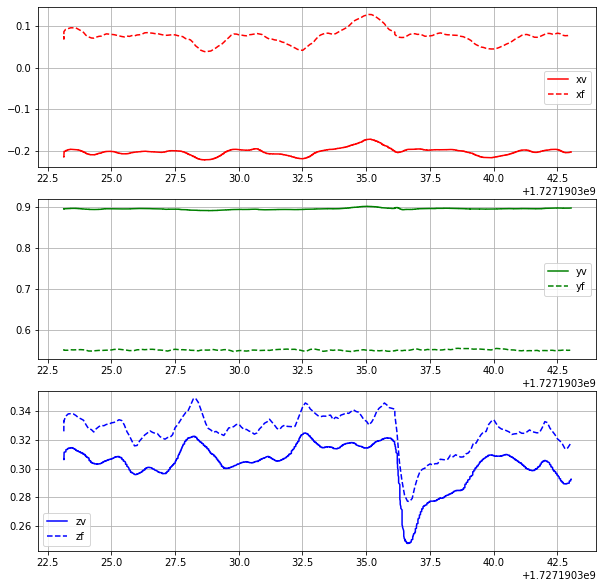

In [35]:
plot_odometries('./bags/flynav_2409_wall_touch.bag')

# TODO: 

- [x] Decouple scripts (Wrench estimation for itself, else in another script)
- [ ] Plot wrench estimation and position side by side in a full experiment

In [36]:
b_wt_full = bagreader('./bags/wall_touch_force_estimate.bag')
print(b_wt_full.topic_table)

[INFO]  Data folder ./bags/wall_touch_force_estimate already exists. Not creating.
                               Topics                               Types  \
0         /flyanav/controller/command  elios_ros_msgs/AccelYawrateCommand   
1                       /flynav/force               geometry_msgs/Vector3   
2              /flynav/force_filtered               geometry_msgs/Vector3   
3                    /flynav/vio_odom                   nav_msgs/Odometry   
4                     /flynav/vio_yaw                    std_msgs/Float64   
5  /kalman_scan2map_node/odometry_ros                   nav_msgs/Odometry   
6                            /pose_in           geometry_msgs/PoseStamped   
7                        /sensors/imu                     sensor_msgs/Imu   
8                              /state                     std_msgs/String   
9                             /yaw_in                    std_msgs/Float64   

   Message Count     Frequency  
0          19750   4804.471936  
1  

[INFO]  Data folder ./bags/wall_touch_force_estimate already exists. Not creating.


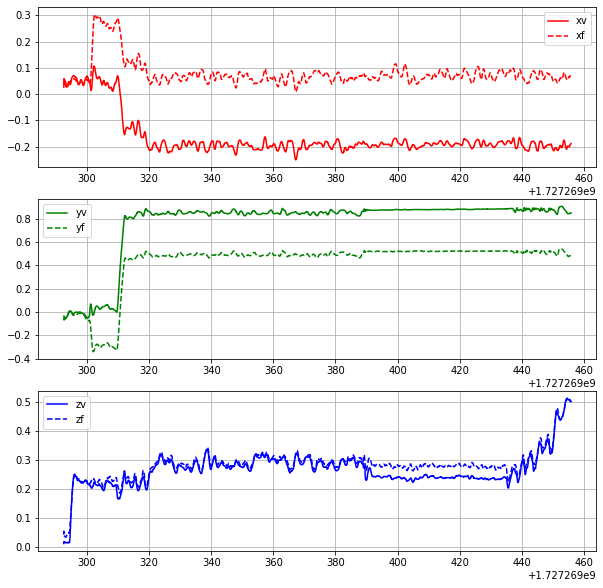

In [37]:
plot_odometries('./bags/wall_touch_force_estimate.bag')
# xv is visual odometry
# xf is kalman 
# check difference between the two? 

In [38]:
def plot_forces(bag_path, plot_name=None): 
    
    bag = bagreader(bag_path)
    
    f_data = bag.message_by_topic('/flynav/force')
    f_filt_data = bag.message_by_topic('/flynav/force_filtered')
    
    df1 = pd.read_csv(f_data)
    df2 = pd.read_csv(f_filt_data)
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    
    ax1.plot(range(0, len(df1['x'])), df1['x'], label='f', color='r')
    ax1.plot(range(0, len(df2['x'])), df2['x'], label='ff', linestyle='--', color='r')
    ax1.legend()
    ax1.grid()
    
    ax2.plot(range(0, len(df1['y'])), df1['y'], label='f', color='g')
    ax2.plot(range(0, len(df2['y'])), df2['y'], label='ff', linestyle='--', color='g')
    ax2.legend()
    ax2.grid()
    
    ax3.plot(range(0, len(df1['z'])), df1['z'], label='f', color='b')
    ax3.plot(range(0, len(df2['z'])), df2['z'], label='ff', linestyle='--', color='b')
    ax3.legend()
    ax3.grid()
    if plot_name:
        fig.savefig(f'./figures/{plot_name}.png')

In [39]:
bag = bagreader('./bags/opti_flynav_comb_flynav.bag')
f_data = bag.message_by_topic('/flynav/force')
f_filt_data = bag.message_by_topic('/flynav/force_filtered')
    
df1 = pd.read_csv(f_data)
df2 = pd.read_csv(f_filt_data)

print(df1)

[INFO]  Data folder ./bags/opti_flynav_comb_flynav already exists. Not creating.
              Time              x              y         z
0     1.727273e+09  8.741854e+187  2.711254e-315  0.719375
1     1.727273e+09  8.741854e+187  2.809864e-315  0.707806
2     1.727273e+09  8.741854e+187  2.810077e-315  0.664451
3     1.727273e+09  8.741854e+187  2.810148e-315  0.697424
4     1.727273e+09  8.741854e+187  2.907422e-315  0.711956
...            ...            ...            ...       ...
9186  1.727273e+09  8.742359e+187  3.391533e-315  0.559534
9187  1.727273e+09  8.742359e+187  3.391831e-315  0.360893
9188  1.727273e+09  8.742359e+187  3.497139e-315  0.541005
9189  1.727273e+09  8.742359e+187  3.497222e-315  0.529490
9190  1.727273e+09  8.742359e+187  3.497342e-315  0.529090

[9191 rows x 4 columns]


[INFO]  Data folder ./bags/wall_touch_force_estimate already exists. Not creating.


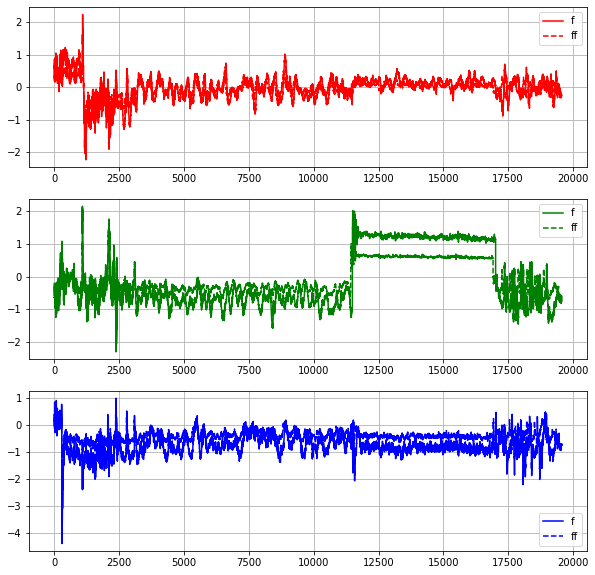

In [40]:
plot_forces('./bags/wall_touch_force_estimate.bag')

[INFO]  Data folder ./bags/opti_flynav_comb_flynav already exists. Not creating.
[INFO]  Data folder ./bags/opti_flynav_comb_flynav already exists. Not creating.


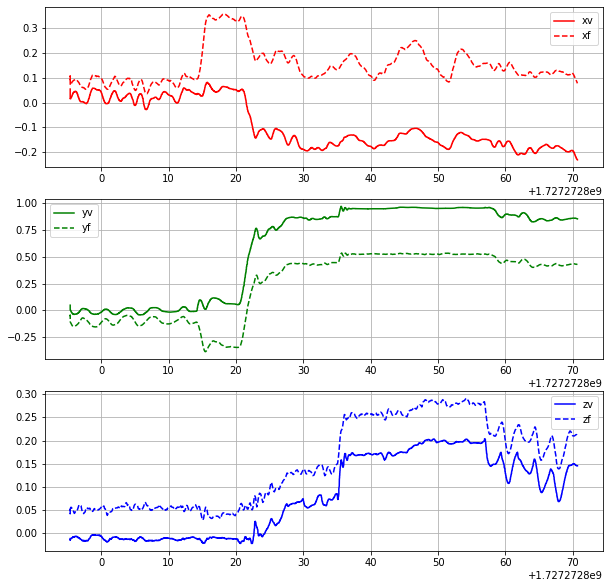

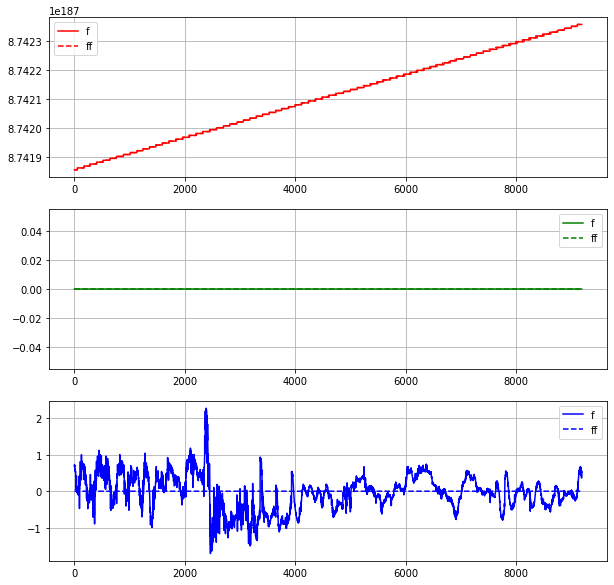

In [41]:
plot_odometries('./bags/opti_flynav_comb_flynav.bag')
plot_forces('./bags/opti_flynav_comb_flynav.bag')

[INFO]  Data folder ./bags/opti_flynav_comb_opti already exists. Not creating.


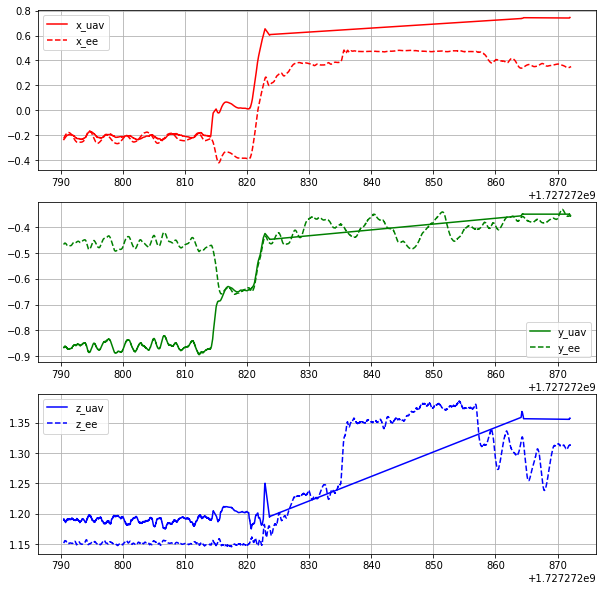

In [42]:
plot_opti_position('./bags/opti_flynav_comb_opti.bag')

[INFO]  Data folder ./bags/opti_flynav_comb_opti already exists. Not creating.
[INFO]  Data folder ./bags/opti_flynav_comb_opti already exists. Not creating.


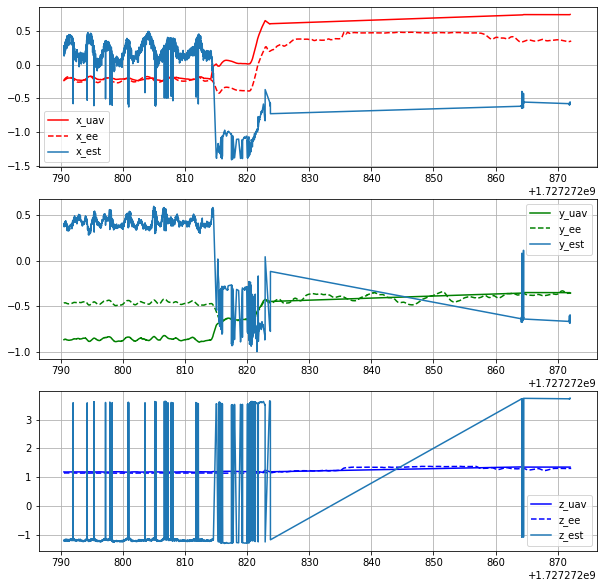

In [43]:
T_uav, T_ee, T_calib = get_Ts('./bags/opti_flynav_comb_opti.bag')
plot_opti_position_and_estimate('./bags/opti_flynav_comb_opti.bag', T_calib[0])

In [44]:
fpth = './bags/wt1_flynav.bag'
opth = './bags/wt1_opti.bag'

bag1 = bagreader(fpth)
    
fo1 = bag1.message_by_topic('/flynav/vio_odom')
fo2 = bag1.message_by_topic('/kalman_scan2map_node/odometry_ros')
fo3 = bag1.message_by_topic('/flynav/force')
    
df_vio = pd.read_csv(fo1)
df_kf = pd.read_csv(fo2)
df_ff = pd.read_csv(fo3)

bag2 = bagreader(opth)

oo1 = bag2.message_by_topic('/mocap_helper/opt_elios_pose')
oo2 = bag2.message_by_topic('/mocap_helper/opt_ee_pose')

df_opt_elios = pd.read_csv(oo1)
df_opt_ee = pd.read_csv(oo2)

#df_vio['Time'] = scale_time(df_vio['Time'])
#df_kf['Time'] = scale_time(df_kf['Time'])
#df_opt_elios['Time'] = scale_time(df_opt_elios['Time'])
#df_ff['Time'] = scale_time(df_ff['Time'])

[INFO]  Data folder ./bags/wt1_flynav already exists. Not creating.
[INFO]  Data folder ./bags/wt1_opti already exists. Not creating.


## Plotting wrenches and velocities

In [120]:
def plot_force_vel(df_vio, df_ff, plot_name=None):

    fig, axs = plt.subplots(6, 1, figsize=(14,12), sharex=True)

    axs[0].plot(df_vio['Time'], df_vio['twist.twist.linear.x'], color='r', linestyle='-.', label='x_v')
    axs[0].grid()
    axs[0].legend()

    axs[1].plot(df_ff['Time'], df_ff['vector.x'], color='r', label='fx')
    axs[1].grid()
    axs[1].legend()

    axs[2].plot(df_vio['Time'], df_vio['twist.twist.linear.y'], color='g', linestyle='-.', label='y_v')
    axs[2].grid()
    axs[2].legend()

    axs[3].plot(df_ff['Time'], df_ff['vector.y'], color='g', label='fy')
    axs[3].grid()
    axs[3].legend()

    axs[4].plot(df_vio['Time'], df_vio['twist.twist.linear.z'], color='b', linestyle='-.', label='y_v')
    axs[4].grid()
    axs[4].legend()

    axs[5].plot(df_ff['Time'], df_ff['vector.z'], color='b', label='fz')
    axs[5].grid()
    axs[5].legend()
    if plot_name:
        fig.savefig('./{plot_name}.png')

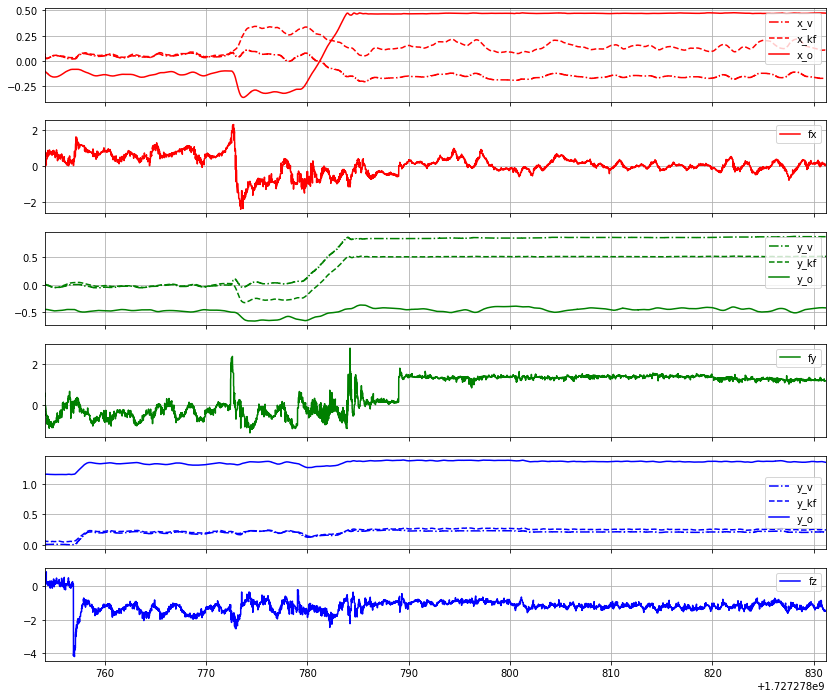

In [47]:
fig, axs = plt.subplots(6, 1, figsize=(14,12), sharex=True)

# 2nd one
axs[0].plot(df_vio['Time'], df_vio['pose.pose.position.x'], color='r', linestyle='-.', label='x_v')
axs[0].plot(df_kf['Time'], df_kf['pose.pose.position.x'], color='r', linestyle='--', label='x_kf')
axs[0].plot(df_opt_elios['Time'], df_opt_elios['pose.position.x'], color='r', label='x_o')
axs[0].grid()
axs[0].legend()
axs[0].set_xlim((min(df_kf['Time']), max(df_kf['Time'])))


axs[1].plot(df_ff['Time'], df_ff['vector.x'], color='r', label='fx')
axs[1].grid()
axs[1].legend()

axs[2].plot(df_vio['Time'], df_vio['pose.pose.position.y'], color='g', linestyle='-.', label='y_v')
axs[2].plot(df_kf['Time'], df_kf['pose.pose.position.y'], color='g', linestyle='--', label='y_kf')
axs[2].plot(df_opt_elios['Time'], df_opt_elios['pose.position.y'], color='g', label='y_o')
axs[2].grid()
axs[2].legend()

axs[3].plot(df_ff['Time'], df_ff['vector.y'], color='g', label='fy')
axs[3].grid()
axs[3].legend()

axs[4].plot(df_vio['Time'], df_vio['pose.pose.position.z'], color='b', linestyle='-.', label='y_v')
axs[4].plot(df_kf['Time'], df_kf['pose.pose.position.z'], color='b', linestyle='--', label='y_kf')
axs[4].plot(df_opt_elios['Time'], df_opt_elios['pose.position.z'], color='b', label='y_o')
axs[4].grid()
axs[4].legend()

axs[5].plot(df_ff['Time'], df_ff['vector.z'], color='b', label='fz')
axs[5].grid()
axs[5].legend()

In [48]:
fpth = './bags/wt2_flynav.bag'
opth = './bags/wt2_opti.bag'

bag1 = bagreader(fpth)
    
fo1 = bag1.message_by_topic('/flynav/vio_odom')
fo2 = bag1.message_by_topic('/kalman_scan2map_node/odometry_ros')
fo3 = bag1.message_by_topic('/flynav/force')
    
df_vio = pd.read_csv(fo1)
df_kf = pd.read_csv(fo2)
df_ff = pd.read_csv(fo3)

bag2 = bagreader(opth)

oo1 = bag2.message_by_topic('/mocap_helper/opt_elios_pose')
oo2 = bag2.message_by_topic('/mocap_helper/opt_ee_pose')

df_opt_elios = pd.read_csv(oo1)
df_opt_ee = pd.read_csv(oo2)


[INFO]  Data folder ./bags/wt2_flynav already exists. Not creating.
[INFO]  Data folder ./bags/wt2_opti already exists. Not creating.


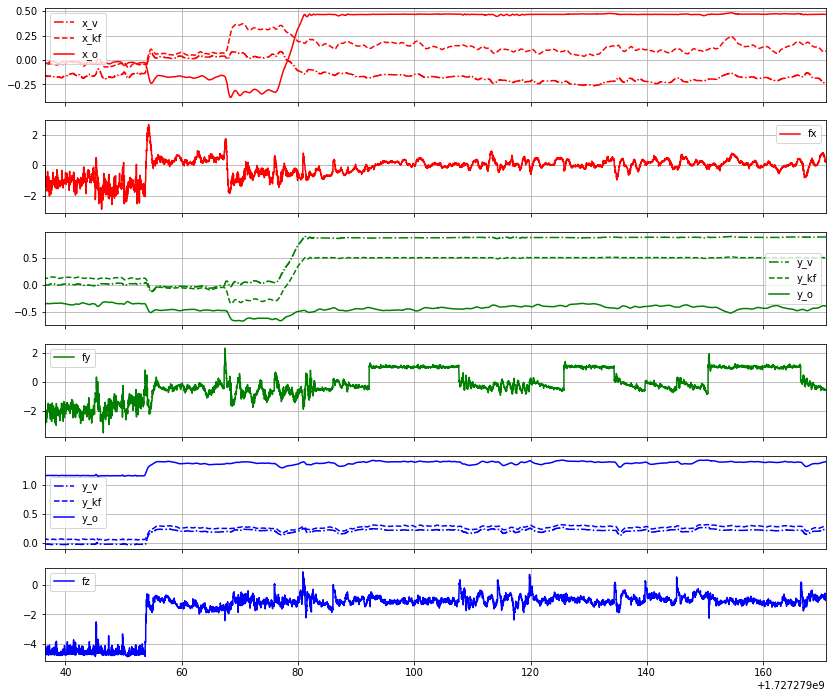

In [49]:
fig, axs = plt.subplots(6, 1, figsize=(14,12), sharex=True)

axs[0].plot(df_vio['Time'], df_vio['pose.pose.position.x'], color='r', linestyle='-.', label='x_v')
axs[0].plot(df_kf['Time'], df_kf['pose.pose.position.x'], color='r', linestyle='--', label='x_kf')
axs[0].plot(df_opt_elios['Time'], df_opt_elios['pose.position.x'], color='r', label='x_o')
axs[0].grid()
axs[0].legend()
axs[0].set_xlim((min(df_kf['Time']), max(df_kf['Time'])))

axs[1].plot(df_ff['Time'], df_ff['vector.x'], color='r', label='fx')
axs[1].grid()
axs[1].legend()

axs[2].plot(df_vio['Time'], df_vio['pose.pose.position.y'], color='g', linestyle='-.', label='y_v')
axs[2].plot(df_kf['Time'], df_kf['pose.pose.position.y'], color='g', linestyle='--', label='y_kf')
axs[2].plot(df_opt_elios['Time'], df_opt_elios['pose.position.y'], color='g', label='y_o')
axs[2].grid()
axs[2].legend()

axs[3].plot(df_ff['Time'], df_ff['vector.y'], color='g', label='fy')
axs[3].grid()
axs[3].legend()

axs[4].plot(df_vio['Time'], df_vio['pose.pose.position.z'], color='b', linestyle='-.', label='y_v')
axs[4].plot(df_kf['Time'], df_kf['pose.pose.position.z'], color='b', linestyle='--', label='y_kf')
axs[4].plot(df_opt_elios['Time'], df_opt_elios['pose.position.z'], color='b', label='y_o')
axs[4].grid()
axs[4].legend()

axs[5].plot(df_ff['Time'], df_ff['vector.z'], color='b', label='fz')
axs[5].grid()
axs[5].legend()

fig.savefig('./multiple_touches.png')

## observation: 

Without VRPN client, we don't have velocity of the object, it may be thoughtful to check if it is possible to include velocity somehow. 

## TODO: 

- [ ] Compared with and without scaled time 

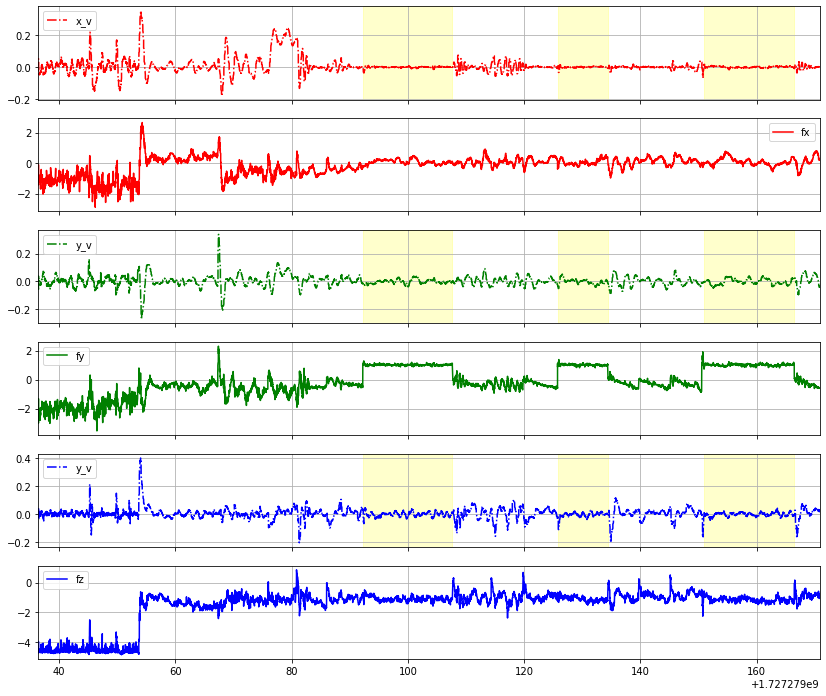

In [56]:
list_ = get_x_regions(df_ff['Time'], df_ff['vector.y'], 0.8)

axs[0].set_title('Velocity/Estimated force plot')

fig, axs = plt.subplots(6, 1, figsize=(14,12), sharex=True)

axs[0].plot(df_vio['Time'], df_vio['twist.twist.linear.x'], color='r', linestyle='-.', label='x_v')
axs[0].axvspan(list_[2][0], list_[2][1], color='yellow', alpha=0.2)
axs[0].axvspan(list_[3][0], list_[3][1], color='yellow', alpha=0.2)
axs[0].axvspan(list_[5][0], list_[5][1], color='yellow', alpha=0.2)
axs[0].grid()
axs[0].legend()
axs[0].set_xlim((min(df_kf['Time']), max(df_kf['Time'])))

axs[1].plot(df_ff['Time'], df_ff['vector.x'], color='r', label='fx')
axs[1].grid()
axs[1].legend()

axs[2].plot(df_vio['Time'], df_vio['twist.twist.linear.y'], color='g', linestyle='-.', label='y_v')
axs[2].axvspan(list_[2][0], list_[2][1], color='yellow', alpha=0.2)
axs[2].axvspan(list_[3][0], list_[3][1], color='yellow', alpha=0.2)
axs[2].axvspan(list_[5][0], list_[5][1], color='yellow', alpha=0.2)
axs[2].grid()
axs[2].legend()

axs[3].plot(df_ff['Time'], df_ff['vector.y'], color='g', label='fy')
axs[3].grid()
axs[3].legend()

axs[4].plot(df_vio['Time'], df_vio['twist.twist.linear.z'], color='b', linestyle='-.', label='y_v')
axs[4].axvspan(list_[2][0], list_[2][1], color='yellow', alpha=0.2)
axs[4].axvspan(list_[3][0], list_[3][1], color='yellow', alpha=0.2)
axs[4].axvspan(list_[5][0], list_[5][1], color='yellow', alpha=0.2)
axs[4].grid()
axs[4].legend()

axs[5].plot(df_ff['Time'], df_ff['vector.z'], color='b', label='fz')
axs[5].grid()
axs[5].legend()

fig.savefig('./multiple_touches_whole_exp.png')

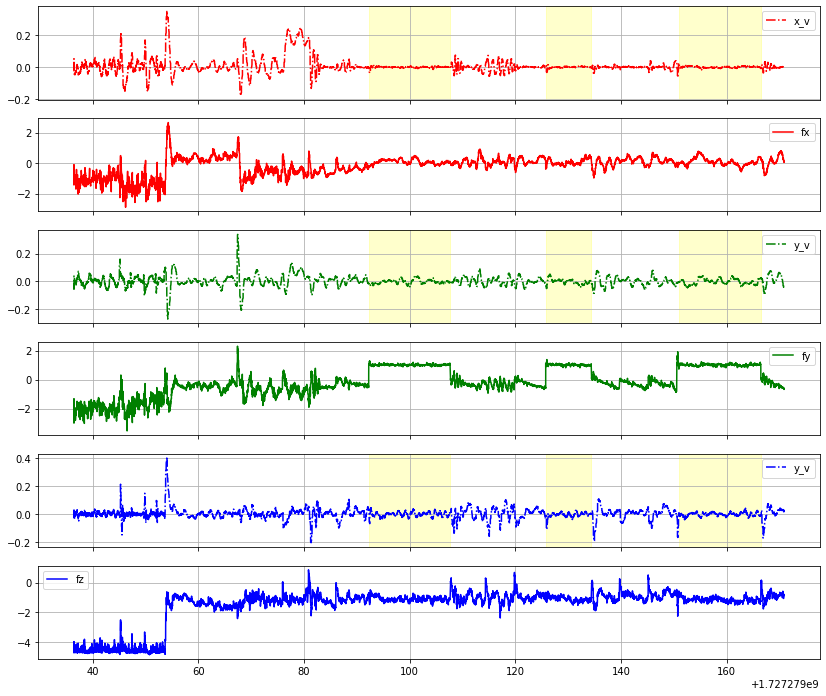

In [57]:
fig, axs = plt.subplots(6, 1, figsize=(14,12), sharex=True)

axs[0].plot(df_vio['Time'], df_vio['twist.twist.linear.x'], color='r', linestyle='-.', label='x_v')
axs[0].axvspan(list_[2][0], list_[2][1], color='yellow', alpha=0.2)
axs[0].axvspan(list_[3][0], list_[3][1], color='yellow', alpha=0.2)
axs[0].axvspan(list_[5][0], list_[5][1], color='yellow', alpha=0.2)
axs[0].grid()
axs[0].legend()
#axs[0].set_xlim(list_[2][0], list_[5][1])

axs[1].plot(df_ff['Time'], df_ff['vector.x'], color='r', label='fx')
axs[1].grid()
axs[1].legend()

axs[2].plot(df_vio['Time'], df_vio['twist.twist.linear.y'], color='g', linestyle='-.', label='y_v')
axs[2].axvspan(list_[2][0], list_[2][1], color='yellow', alpha=0.2)
axs[2].axvspan(list_[3][0], list_[3][1], color='yellow', alpha=0.2)
axs[2].axvspan(list_[5][0], list_[5][1], color='yellow', alpha=0.2)
axs[2].grid()
axs[2].legend()

axs[3].plot(df_ff['Time'], df_ff['vector.y'], color='g', label='fy')
axs[3].grid()
axs[3].legend()

axs[4].plot(df_vio['Time'], df_vio['twist.twist.linear.z'], color='b', linestyle='-.', label='y_v')
axs[4].axvspan(list_[2][0], list_[2][1], color='yellow', alpha=0.2)
axs[4].axvspan(list_[3][0], list_[3][1], color='yellow', alpha=0.2)
axs[4].axvspan(list_[5][0], list_[5][1], color='yellow', alpha=0.2)
axs[4].grid()
axs[4].legend()

axs[5].plot(df_ff['Time'], df_ff['vector.z'], color='b', label='fz')
axs[5].grid()
axs[5].legend()

fig.savefig('./multiple_touches.png')

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(14,12), sharex=True)

axs[0].plot(df_vio['Time'], v0_, color='r', label='0 norm')
axs[1].plot(df_vio['Time'], v1_, color='g', linestyle='-.', label='1 norm')
axs[2].plot(df_vio['Time'], v2_, color='b', linestyle='--', label='2 norm')
axs[0].set_xlim(list_[2][0], list_[5][1])

In [51]:
v_vect = [np.array([x, y, z]) for x, y, z in zip(df_vio['twist.twist.linear.x'], df_vio['twist.twist.linear.y'], df_vio['twist.twist.linear.z'])]
v0_ = [abs(max(v)) for v in v_vect]
v1_ = [sum(v) for v in v_vect]
v2_ = [np.sqrt(v[0]**2+v[1]**2+v[2]**2) for v in v_vect]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Region to shade (e.g., shade where x is between 3 and 7)
shade_start = 3
shade_end = 7

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot on first subplot
ax1.plot(x, y1, label='sin(x)')
ax1.axvspan(shade_start, shade_end, color='yellow', alpha=0.3, label=f'{shade_start} < x < {shade_end}')
ax1.set_title('Sine Plot with Shaded Region over Y-axis')
ax1.legend()

# Plot on second subplot
ax2.plot(x, y2, label='cos(x)')
ax2.axvspan(shade_start, shade_end, color='red', alpha=0.3, label=f'{shade_start} < x < {shade_end}')
ax2.set_title('Cosine Plot with Shaded Region over Y-axis')
ax2.legend()

# Add labels to shared x-axis
plt.xlabel('x')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## TODO:

- [ ] Senzor sile za usporedbu 
- [x] RMSE brzina
- [x] RMSE sila 
- [ ] probati napraviti eksperiment s pločom pod kutem i usporediti sile 
- [ ] preciznost točke koju dodirujem 
- [ ] pozicija/impedancija 
- [ ] pogledati Paul Oh članak 
- [ ] provjeriti eksperimente od interesa
- [ ] raspitati se za haptic device 
- [ ] plotting and kinematic chain 

## Contact/No Contact RMSE comparison

In [78]:
def crop_ts(ts_val, ts_t, start_val, stop_val): 
    ix1 = ts_t[ts_t == start_val].index[0]
    ix2 = ts_t[ts_t == stop_val].index[0]

    return ts_val[ix1:ix2]

In [114]:
xc1 = crop_ts(df_ff['vector.x'], df_ff['Time'], list_[2][0], list_[2][1])
xnc1 = crop_ts(df_ff['vector.x'], df_ff['Time'], list_[2][1], list_[3][0])
xc1_rmse = rmse1(xc1)
xnc1_rmse = rmse1(xnc1)

yc1 = crop_ts(df_ff['vector.y'], df_ff['Time'], list_[2][0], list_[2][1])
ync1 = crop_ts(df_ff['vector.y'], df_ff['Time'], list_[2][1], list_[3][0])
yc1_rmse = rmse1(yc1)
ync1_rmse = rmse1(ync1)

zc1 = crop_ts(df_ff['vector.z'], df_ff['Time'], list_[2][0], list_[2][1])
znc1 = crop_ts(df_ff['vector.z'], df_ff['Time'], list_[2][1], list_[3][0])
zc1_rmse = rmse1(zc1)
znc1_rmse = rmse1(znc1)

def rmse1(x): 
    return (np.sqrt(sum(abs(x))/len(x)))

In [115]:
xc1 = crop_ts(df_vio['twist.twist.linear.x'], df_ff['Time'], list_[2][0], list_[2][1])
xnc1 = crop_ts(df_vio['twist.twist.linear.x'], df_ff['Time'], list_[2][1], list_[3][0])
xc1_rmse = rmse1(xc1)
xnc1_rmse = rmse1(xnc1)

yc1 = crop_ts(df_vio['twist.twist.linear.y'], df_ff['Time'], list_[2][0], list_[2][1])
ync1 = crop_ts(df_vio['twist.twist.linear.y'], df_ff['Time'], list_[2][1], list_[3][0])
yc1_rmse = rmse1(yc1)
ync1_rmse = rmse1(ync1)

zc1 = crop_ts(df_vio['twist.twist.linear.z'], df_ff['Time'], list_[2][0], list_[2][1])
znc1 = crop_ts(df_vio['twist.twist.linear.z'], df_ff['Time'], list_[2][1], list_[3][0])
zc1_rmse = rmse1(zc1)
znc1_rmse = rmse1(znc1)

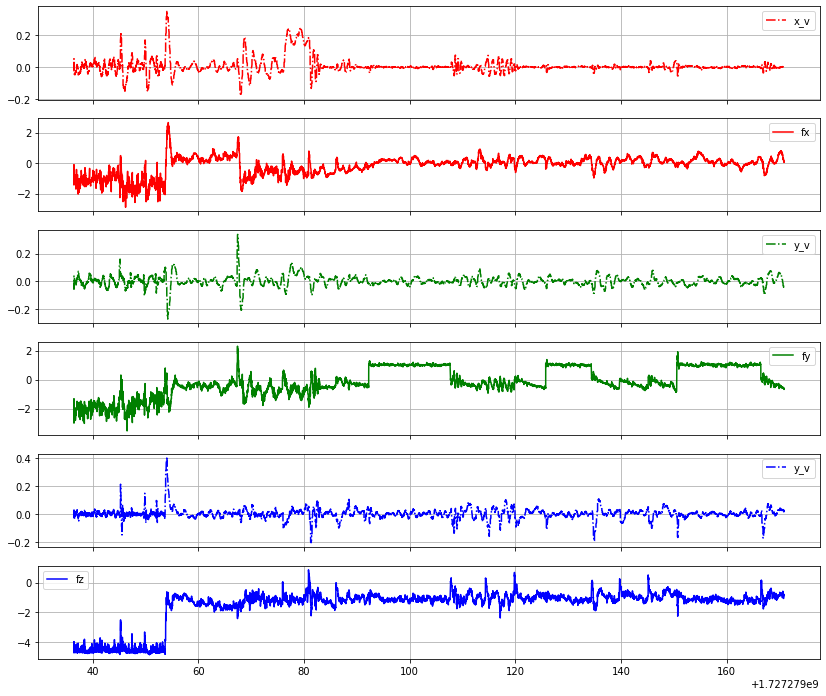

In [122]:
# TODO: Add x_lim
plot_force_vel(df_vio, df_ff)